In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [152]:
diabetes_dataset = fetch_california_housing()

In [153]:
x = np.array(diabetes_dataset["data"])
y = np.array(diabetes_dataset["target"]).reshape(diabetes_dataset["target"].shape[0], 1)

In [154]:
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(x)

In [156]:
def train_test_split(x, y, test_size):
    
    split_index = int(test_size * x.shape[0])
    x_test, x_train = x[: split_index], x[split_index :]
    y_test, y_train = y[: split_index], y[split_index :]

    return x_train, y_train, x_test, y_test

In [157]:
def DataLoader(x, y, batch_size, shuffle = True):
    num_samples = x.shape[0]

    if shuffle == True:
        indices = np.random.permutation(num_samples)
        x = x[indices]
        y = y[indices]

    num_batches = num_samples // batch_size
    batches = []

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        batch_x = x[start_idx:end_idx]
        batch_y = y[start_idx:end_idx]

        batches.append((batch_x, batch_y))

    if num_samples % batch_size != 0:
        start_idx = num_batches * batch_size
        batch_x = x[start_idx:]
        batch_y = y[start_idx:]

    return batches

In [178]:
x_train, y_train, x_test, y_test = train_test_split(X_normalized, y, 0.2)
train_dataloader = DataLoader(x_train, y_train, batch_size = 128, shuffle = True)
test_dataloader = DataLoader(x_test, y_test, batch_size = 128, shuffle = True)

In [197]:
class Perceptron:
    def __init__(self, in_features, out_features):
        self.weight = np.random.rand(in_features, out_features) * 0.1
        self.bias = np.random.randn(out_features)

    def summation(self, x):
        return np.dot(x, self.weight) + self.bias

    def ReLU(self, x):
        return np.maximum(0, x)
    
    def wandb_returner(self):
        return {"weights": self.weight, "bias": self.bias}
    
    def wandb_changer(self, wandb_dict):
        self.weight = wandb_dict["weights"]
        self.bias = wandb_dict["bias"]
    
    def __call__(self, x):
        x = self.summation(x)
        return self.ReLU(x)

In [214]:
model = Perceptron(8, 1)

In [215]:
model.wandb_returner()

{'weights': array([[0.08420782],
        [0.03954285],
        [0.05048902],
        [0.0023679 ],
        [0.09238652],
        [0.09432933],
        [0.0263183 ],
        [0.04537423]]),
 'bias': array([0.33104893])}

In [216]:
def MSELoss(y_train, y_preds):
    return (1 / y_train.shape[0]) * (np.sum((y_train - y_preds) ** 2))

In [217]:
def calc_backprop(y_train, y_preds, x_features):

    m = y_train.shape[0]

    weight_derivatives = (1/m * np.dot((y_preds - y_train).T, x_features)).T
    bias_derivatives = 1/m * np.sum(np.subtract(y_preds, y_train))
    return weight_derivatives, bias_derivatives

In [218]:
def param_init(parameters, weight_derivarives, bias_derivatives, learning_rate):
    w = parameters["weights"]
    b = parameters["bias"]

    w = w - (learning_rate * weight_derivarives)
    b = b - (learning_rate * bias_derivatives)

    return {"weights": w, "bias": b}

In [219]:
def train():
    global training_loss
    training_loss = []
    for epoch in range(2000):
        for batch_idx, (x, y) in enumerate(train_dataloader):
            y_preds = model(x)

            derivatives = calc_backprop(y, y_preds, x)
            wandb_dict = param_init(model.wandb_returner(), derivatives[0], derivatives[1], 0.001)
            model.wandb_changer(wandb_dict)
            del derivatives, wandb_dict
    
        if epoch % 400 == 0:
            print(f"Training Loss: {MSELoss(y, y_preds)}")
            training_loss.append(MSELoss(y, y_preds))

In [220]:
train()

Training Loss: 4.061790515543665
Training Loss: 0.5200197165163563
Training Loss: 0.5207200220729358
Training Loss: 0.520718085831264
Training Loss: 0.5207154622069708


Text(0, 0.5, 'Error Rate')

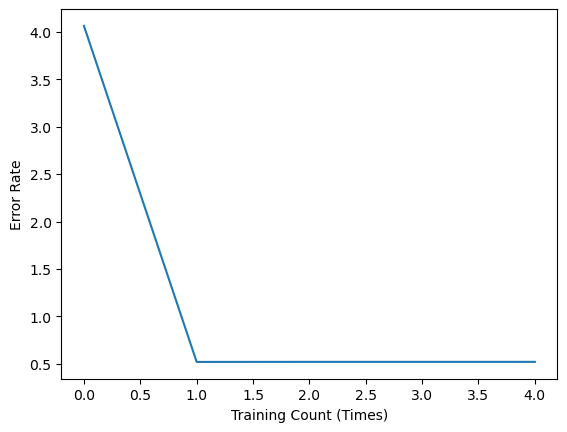

In [224]:
plt.plot([i for i in range(len(training_loss))], training_loss)
plt.xlabel("Training Count (Times)")
plt.ylabel("Error Rate")

In [227]:
model(x_train), print(np.array([
    [2.269999],
    [2.094750],
    [1.952959],
    [0.849234],
    [0.78935],
    [0.90385]
]))

[[2.269999]
 [2.09475 ]
 [1.952959]
 [0.849234]
 [0.78935 ]
 [0.90385 ]]


(array([[2.36291614],
        [2.52570299],
        [2.46203566],
        ...,
        [0.20884841],
        [0.37071648],
        [0.55705702]]),
 None)